In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('../data/used_car_dataset.parquet')
df.set_index('link', inplace=True)
df.head()

,price (HUF),state,desing,vehicle history,financing,clock position (km),shippable persons number,number of doors,color,own weight (kg),...,turning assistant,Take away from 25%,anti-theft,electrically adjustable headrests,home mains charger,type2 charging cable,amplifier,towing hook - electrically foldable,cd library,brand
link,,,,,,,,,,,,,,,,,,,,,
https://www.hasznaltauto.hu/szemelyauto/volkswagen/passat/volkswagen_passat_2.0_tdi_bmt_comfortline_dsg_elso_tulajdonostol_gyari_fenyezesu_garantalt_kilometerrel-19076469#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,6895000,Kitűnő,Sedan,Elérhető autó-előélet alvázszám alapján ...,25%-tól elvihető,110000,5.0,4.0,Fekete (metál),1426.0,...,False,True,False,False,False,False,False,False,False,volkswagen
https://www.hasznaltauto.hu/szemelyauto/citroen/c5_x/citroen_c5_x_1.6_puretech_hybrid_shine_plus_eat8_225_le-19321098#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,19400000,Kitűnő,Kombi,Elérhető autó-előélet alvázszám alapján ...,,17500,5.0,5.0,Szürke (metál),1797.0,...,False,False,False,False,False,False,True,False,False,citroen
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/cla_200/mercedes-benz_cla_200_cdi_d_urban_7g-dct_afa-s_led_fenyszoro_parkolo-asszisztens-19066590#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,8990000,Kitűnő,Coupe,Elérhető autó-előélet alvázszám alapján ...,,73500,5.0,4.0,Fehér,1525.0,...,False,False,True,False,False,False,False,False,False,mercedes-benz
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/a_200/mercedes-benz_a_200_amg_line_7g-dct_afa-s_hosszutavu_berleti_lehetoseg_garancialis_integralt_szervizcsomag-19330075#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,15790000,Kitűnő,Ferdehátú,Elérhető autó-előélet alvázszám alapján ...,20%-tól elvihető,8000,5.0,5.0,Fekete,1375.0,...,False,False,True,False,False,False,False,False,False,mercedes-benz
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/b_250_e/mercedes-benz_b_250_e_amg_line_8g-dct_plug-in_hybrid_afa-s_hosszutavu_berleti_lehetoseg_kedvezo_finanszirozasi_opciok-19383161#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,16990000,Kitűnő,Egyterű,Elérhető autó-előélet alvázszám alapján ...,,7500,5.0,5.0,Piros (metál),1725.0,...,False,False,True,False,False,True,False,False,False,mercedes-benz


In [6]:
', '.join(list(df.columns))

'price (HUF), state, desing, vehicle history, financing, clock position (km), shippable persons number, number of doors, color, own weight (kg), total weight (kg), trunk (l), type of climate, roof, fuel, cylinder capacity (cm3), performance (kW), cylinder arrangement, drive, gearbox, nature of documents, MOT is valid (days), upholstery color (1), upholstery color (2), initial part, term, age_days, summer tire width, summer tires aspect ratio, summer tires construction type, summer tires rim diameter, winter tire width, winter tires aspect ratio, winter tires construction type, winter tires rim diameter, back summer tire width, back summer tires aspect ratio, back summer tires construction type, back summer tires rim diameter, back winter tire width, back winter tires aspect ratio, back winter tires construction type, back winter tires rim diameter, speaker count, electric window in front, abs (anti-lock braking), driver airbag, passenger airbag, electric mirror, central locking, predic

# EDA

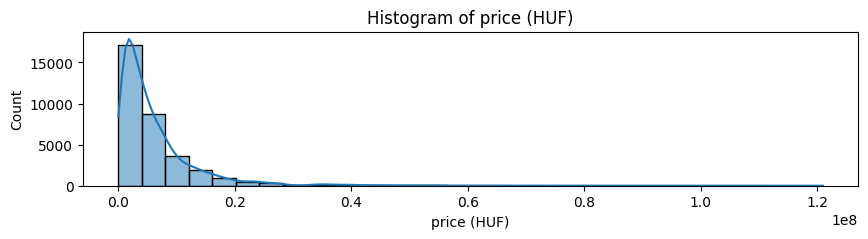

In [3]:
target = 'price (HUF)'
plt.figure(figsize=(10, 2))
sns.histplot(data=df, x=target, bins=30, kde=True)
plt.title(f'Histogram of {target}')
plt.show()

In [4]:
# There are clear outliers in the targer varibles that are much higher than the usual
# To handle this I simple remove this values from the dataset. Since I not even consider to buy such an expensive car.

def cap_values(df, column, multiplier=3):
    # Calculate the IQR of the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper whisker
    upper_whisker = Q3 + multiplier * IQR

    # Replace values above the upper whisker with the value of the upper whisker
    df[column] = df[column].apply(lambda x: upper_whisker if x > upper_whisker else x)

    return df

# filter the data frame
df = cap_values(df, target)

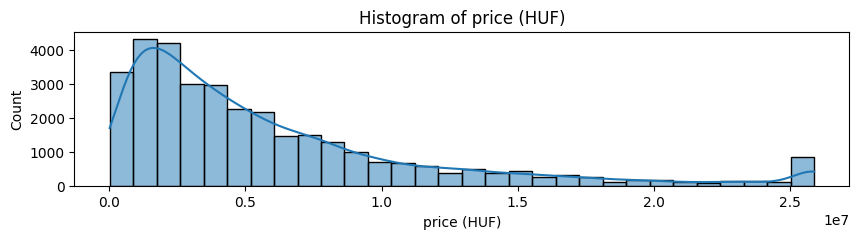

In [5]:
plt.figure(figsize=(10, 2))
sns.histplot(data=df, x=target, bins=30, kde=True)
plt.title(f'Histogram of {target}')
plt.show()

In [6]:
# Define feature types
numeric_features = df.select_dtypes(include=['float','int']).columns
binary_features = df.select_dtypes(include=['bool']).columns
categorical_features = df.select_dtypes(include=['object']).columns

## Distribution of numeric values

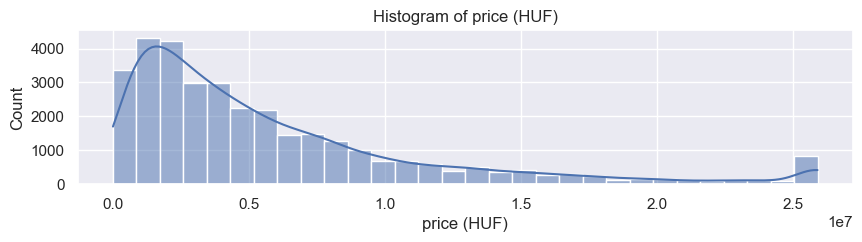

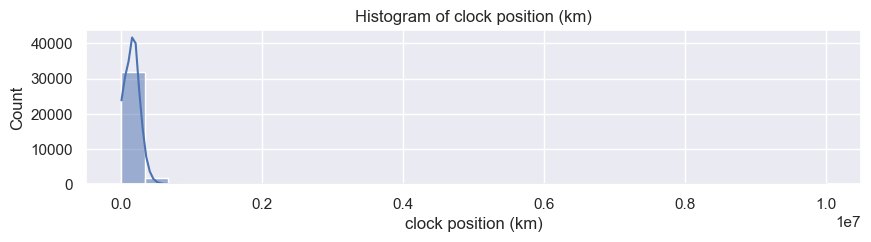

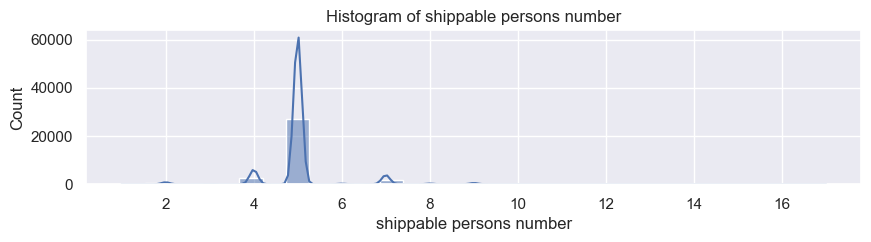

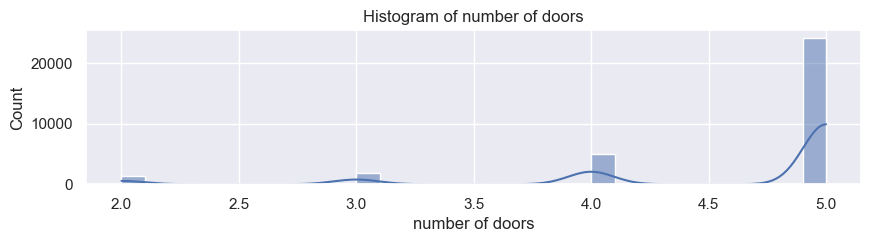

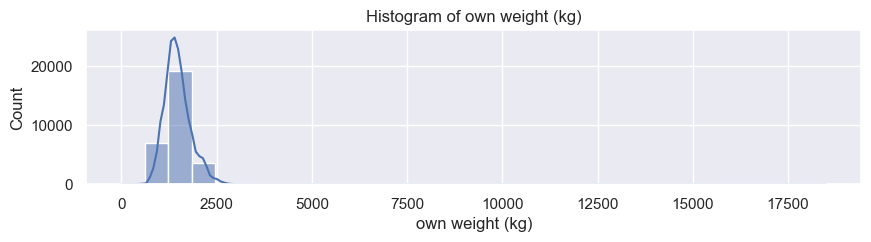

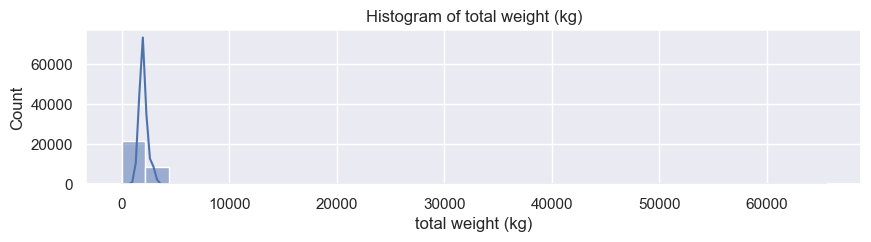

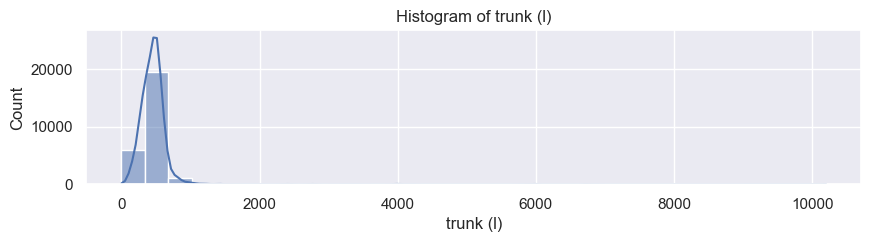

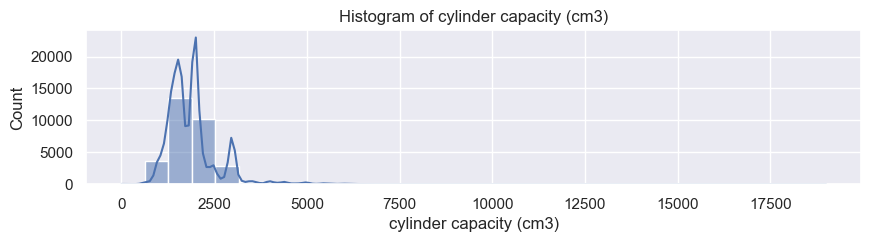

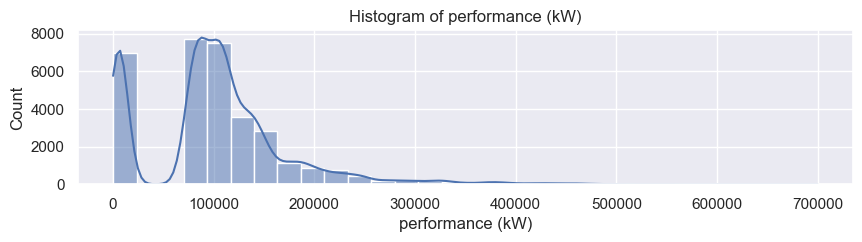

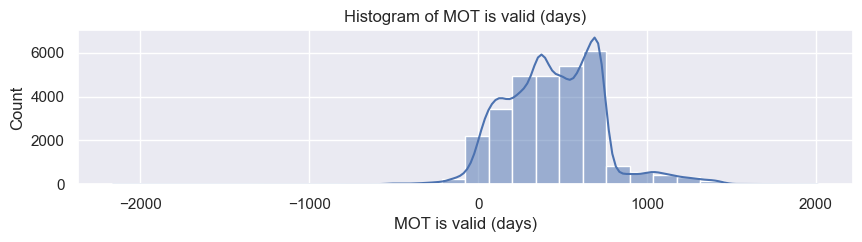

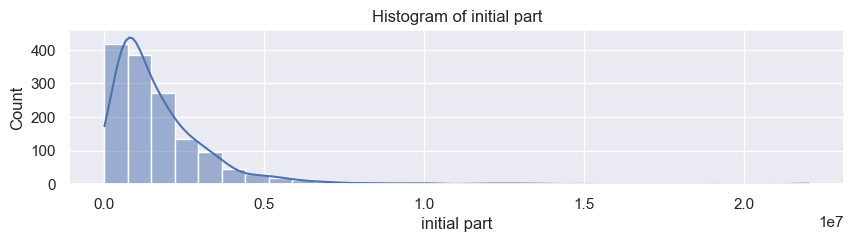

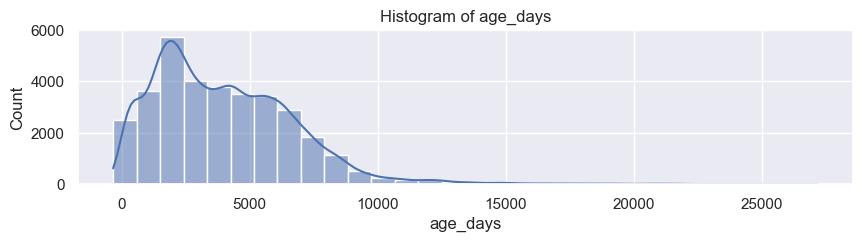

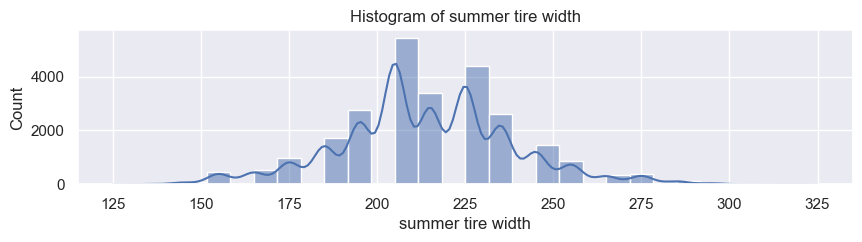

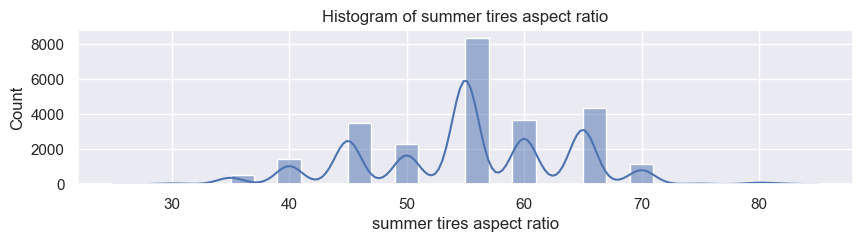

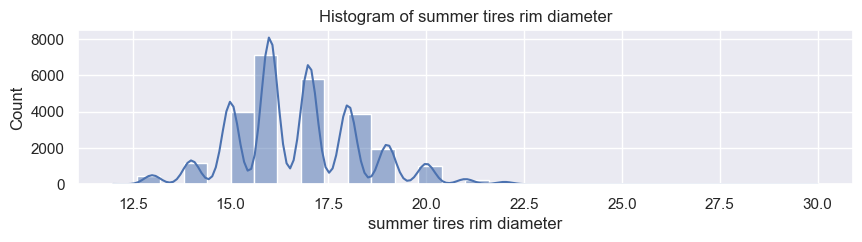

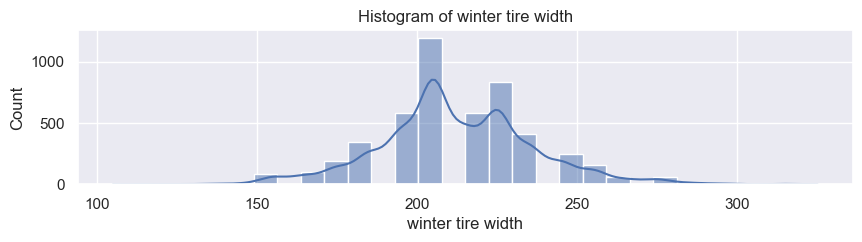

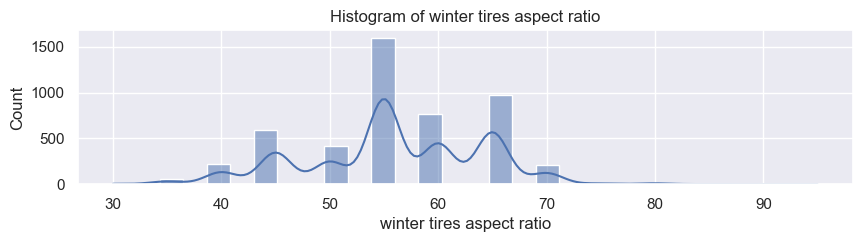

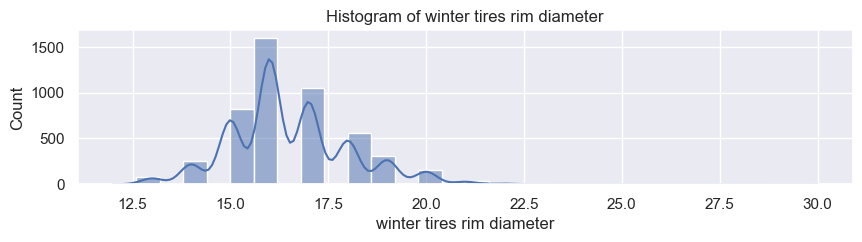

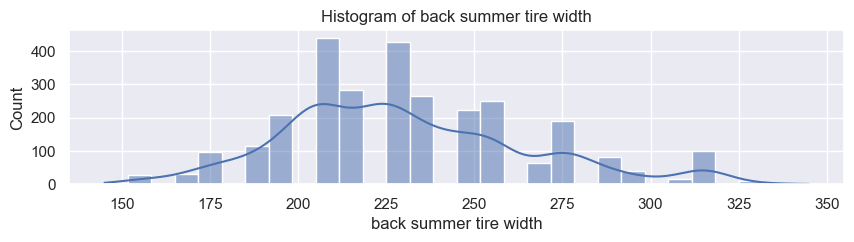

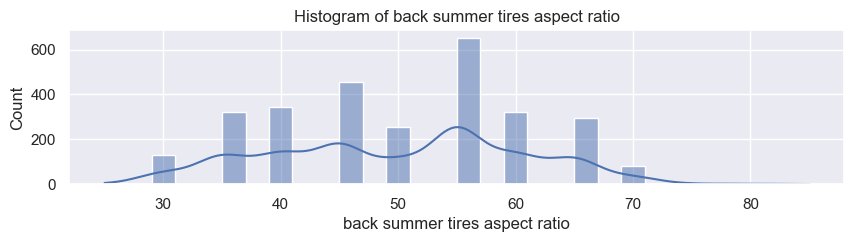

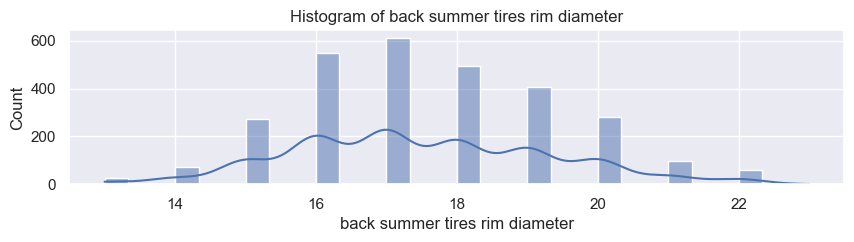

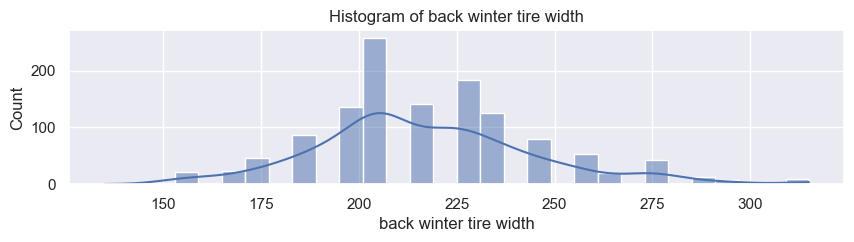

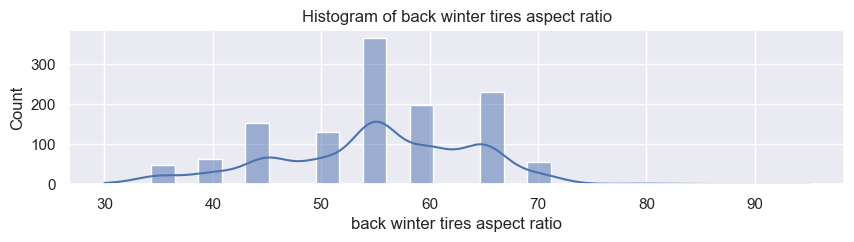

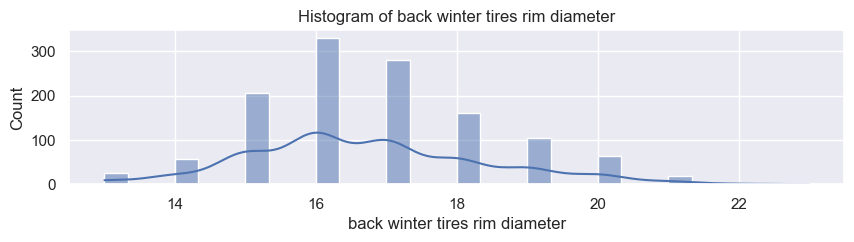

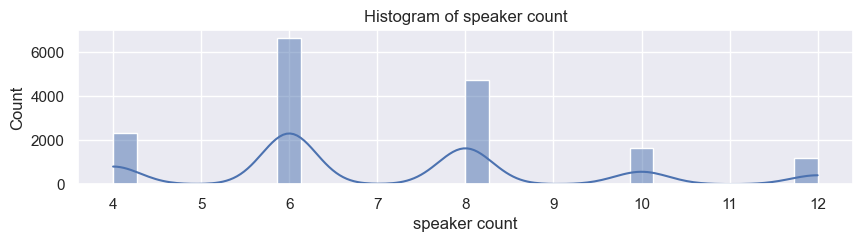

In [7]:
# make sure seaborn style is used
sns.set()

# iterate over the numerical columns and plot a histogram for each
for col in numeric_features:
    plt.figure(figsize=(10, 2))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [8]:
# Some feature has extramily hihg values compare
def has_outliers(df, col, multiplier=3):
    """
    This method uses the IQR scores to eliminate outliers. 
    IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). 
    In the IQR method, a data point is considered as an outlier 
    if it is below the first quartile – 1.5IQR or above the third quartile + 1.5IQR.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    return any((df[col] < lower_bound) | (df[col] > upper_bound))


features_with_outliers = []
for col in numeric_features:
    if has_outliers(df, col):
        print('Handel ouliers at', col)
        df = cap_values(df, col)
        features_with_outliers.append(col)

Handel ouliers at clock position (km)
Handel ouliers at shippable persons number
Handel ouliers at own weight (kg)
Handel ouliers at total weight (kg)
Handel ouliers at trunk (l)
Handel ouliers at cylinder capacity (cm3)
Handel ouliers at performance (kW)
Handel ouliers at MOT is valid (days)
Handel ouliers at initial part
Handel ouliers at age_days
Handel ouliers at summer tire width
Handel ouliers at summer tires rim diameter
Handel ouliers at winter tire width
Handel ouliers at winter tires aspect ratio
Handel ouliers at winter tires rim diameter
Handel ouliers at back winter tires aspect ratio


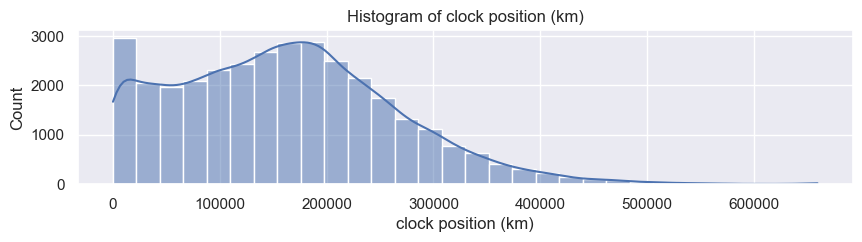

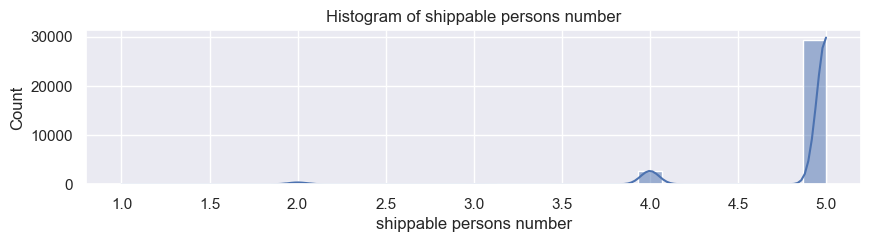

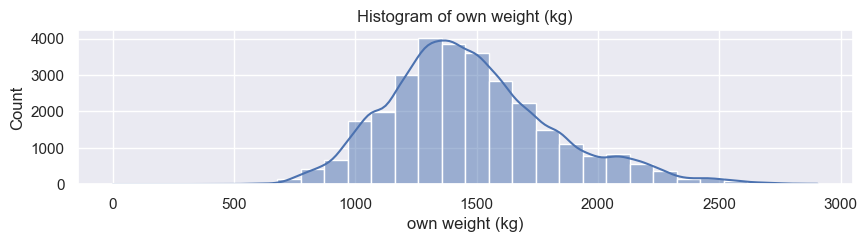

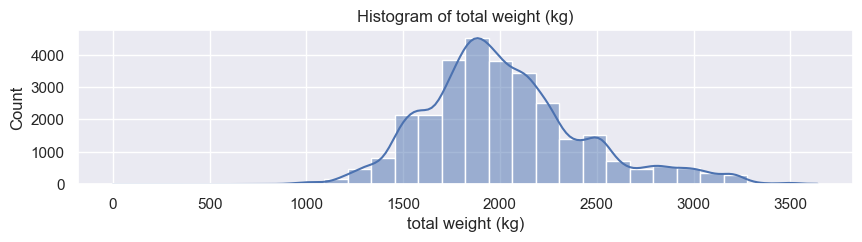

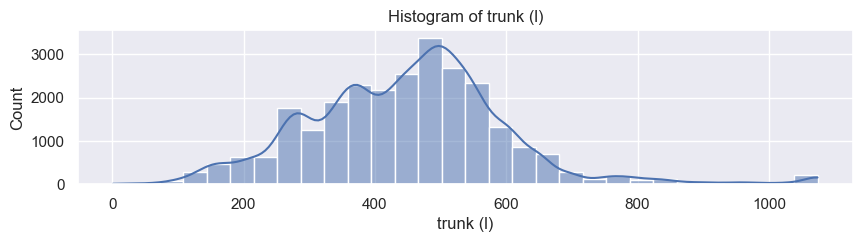

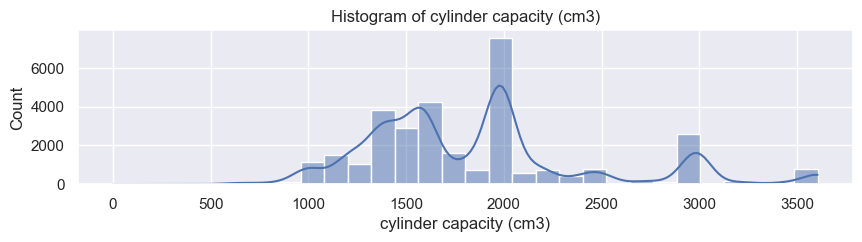

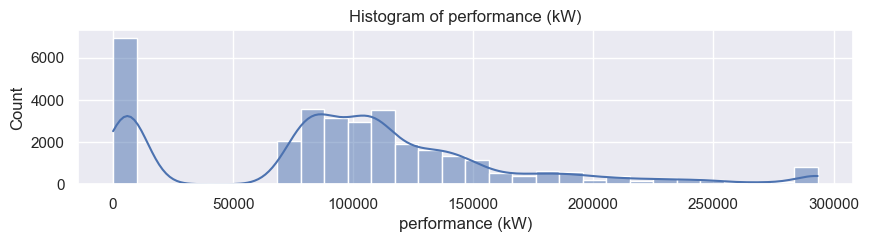

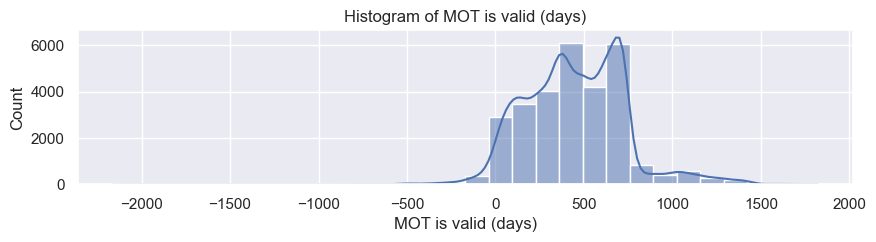

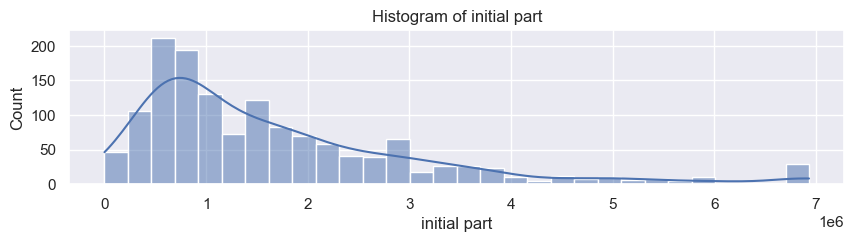

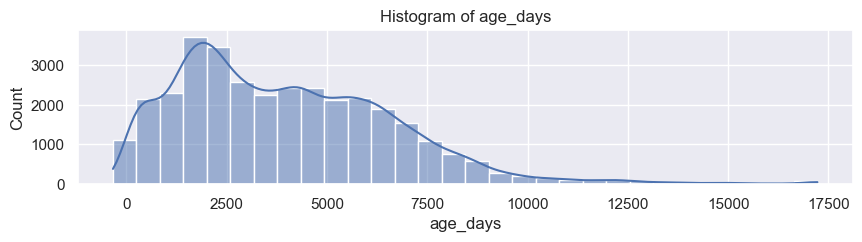

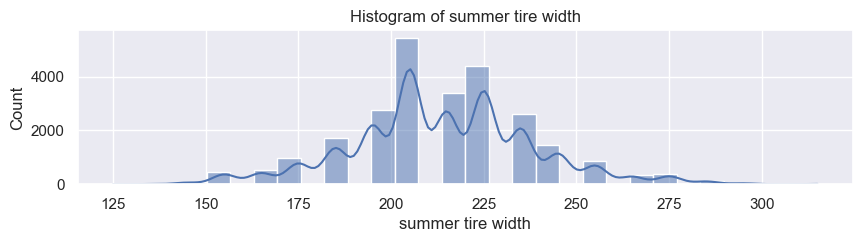

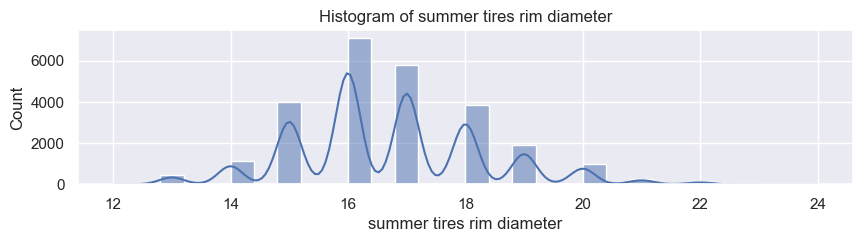

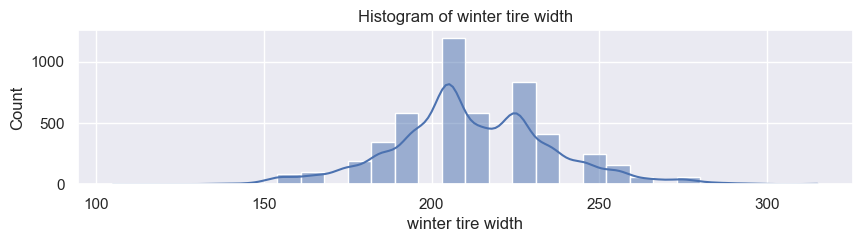

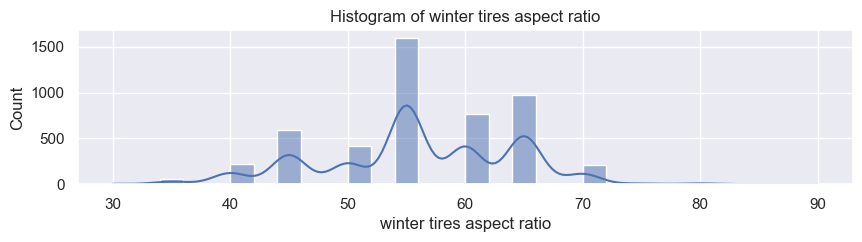

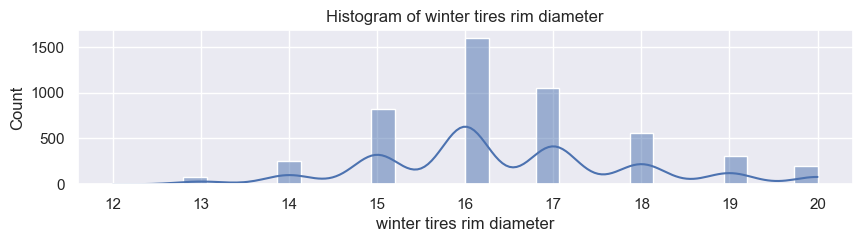

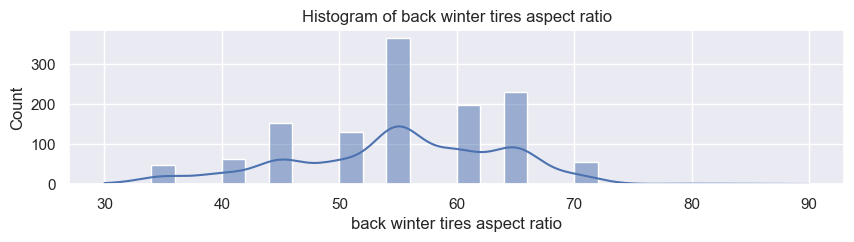

In [9]:
# iterate over the numerical columns and plot a histogram for each
for col in features_with_outliers:
    plt.figure(figsize=(10, 2))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

## Existance ratio of binary values

In [10]:
df_exists_ratio = pd.DataFrame(df[binary_features].mean(), columns=['Ratio of exists']).reset_index(names='Feature')
df_exists_ratio.head()

,Feature,Ratio of exists
0,electric window in front,0.888039
1,abs (anti-lock braking),0.822617
2,driver airbag,0.821435
3,passenger airbag,0.814284
4,electric mirror,0.790438


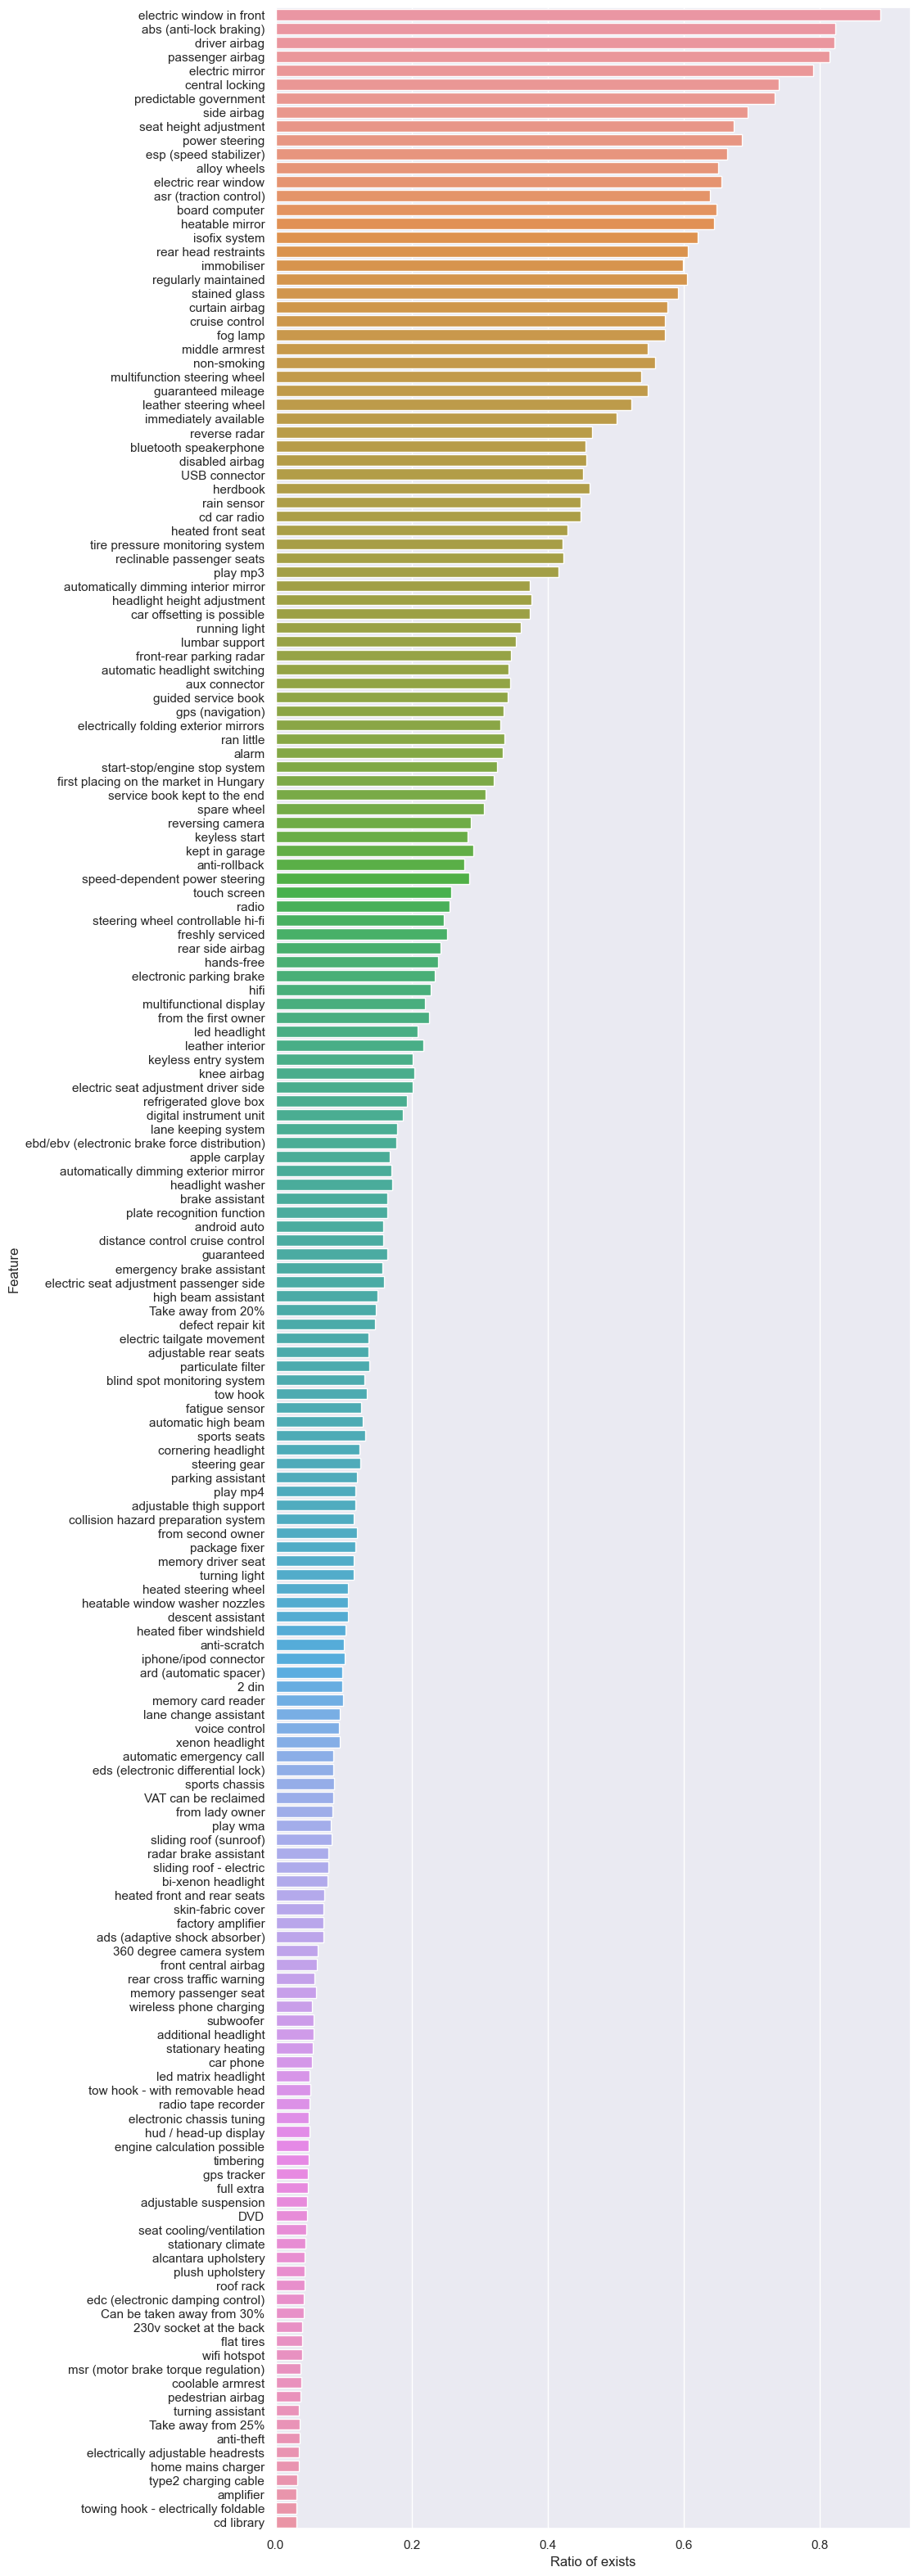

In [11]:
# Set the figure size
plt.figure(figsize=(10, 40))

# Create bar plot
sns.barplot(y='Feature', x='Ratio of exists', data=df_exists_ratio)

# Set labels and title
# plt.xlabel('Ratio of exists')
# plt.ylabel('Feature')
# plt.title('Feature Existence Ratio')

# Show the plot
plt.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_pie_chart(data, column):
    plt.figure(figsize=(10,7))
    
    # Use Seaborn styles
    sns.set()
    
    # Create a pie chart
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    
    # Add a title
    plt.title('Distribution of ' + column, fontsize=14)
    
    # Show the plot
    plt.show()

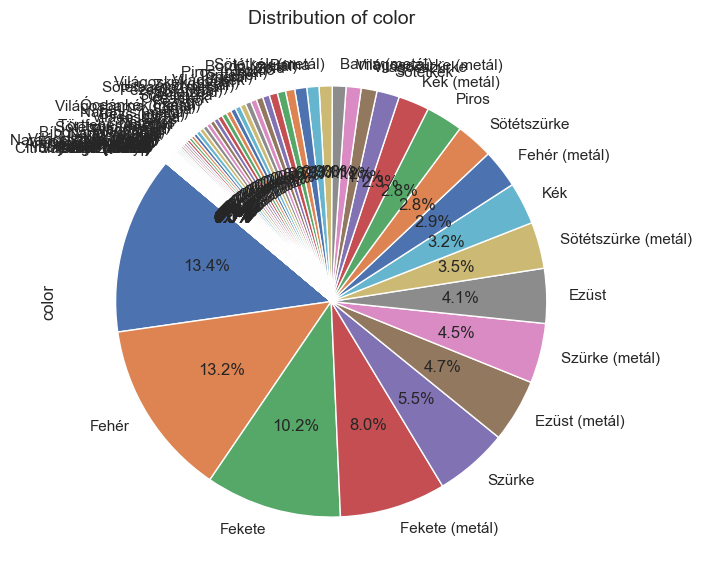

In [13]:
create_pie_chart(df, 'color')

In [14]:
# Feature engennering
df2 = df.copy()
# set color 
df2['matal'] = df2['color'].str.contains('metál').astype(int)
df2['color'] = df2['color'].str.replace(' (metál)', '', regex=False).str.lower()


In [15]:
def bucketing(df, column, threshold):
    # bin/bucket these low-frequency categories into a new category, like 'Other'.
    value_counts = df[column].value_counts()
    rare_cats = value_counts[value_counts < threshold].index
    if len(rare_cats) > 0:
        df[column] = df[column].replace(rare_cats, 'Other')

        # Combine 'Other' with the next smallest category if 'Other' is still rare
        while df[column].value_counts().loc['Other'] < threshold:
            # find the smallest category that is not 'Other'
            small_cat = df[column].value_counts()[df[column].value_counts().index != 'Other'].idxmin()
            # combine 'Other' and the smallest category
            df[column] = df[column].replace({small_cat: 'Other'})

    # If only 1 uniqu value is left then drop the colum
    if len(df[column].unique()) == 1:
        df.drop(columns=[column], inplace=True)
        print('Drop column', column)

    return df

In [16]:
for col in categorical_features:
    df2 = bucketing(df2, col, 300)

df2.head()

Drop column vehicle history


,price (HUF),state,desing,financing,clock position (km),shippable persons number,number of doors,color,own weight (kg),total weight (kg),...,Take away from 25%,anti-theft,electrically adjustable headrests,home mains charger,type2 charging cable,amplifier,towing hook - electrically foldable,cd library,brand,matal
link,,,,,,,,,,,,,,,,,,,,,
https://www.hasznaltauto.hu/szemelyauto/volkswagen/passat/volkswagen_passat_2.0_tdi_bmt_comfortline_dsg_elso_tulajdonostol_gyari_fenyezesu_garantalt_kilometerrel-19076469#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,6895000.0,Kitűnő,Sedan,25%-tól elvihető,110000.0,5.0,4.0,fekete,1426.0,2040.0,...,True,False,False,False,False,False,False,False,volkswagen,1
https://www.hasznaltauto.hu/szemelyauto/citroen/c5_x/citroen_c5_x_1.6_puretech_hybrid_shine_plus_eat8_225_le-19321098#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,19400000.0,Kitűnő,Kombi,,17500.0,5.0,5.0,szürke,1797.0,2185.0,...,False,False,False,False,False,True,False,False,citroen,1
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/cla_200/mercedes-benz_cla_200_cdi_d_urban_7g-dct_afa-s_led_fenyszoro_parkolo-asszisztens-19066590#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,8990000.0,Kitűnő,Coupe,,73500.0,5.0,4.0,fehér,1525.0,2005.0,...,False,True,False,False,False,False,False,False,mercedes-benz,0
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/a_200/mercedes-benz_a_200_amg_line_7g-dct_afa-s_hosszutavu_berleti_lehetoseg_garancialis_integralt_szervizcsomag-19330075#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,15790000.0,Kitűnő,Ferdehátú,20%-tól elvihető,8000.0,5.0,5.0,fekete,1375.0,1885.0,...,False,True,False,False,False,False,False,False,mercedes-benz,0
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/b_250_e/mercedes-benz_b_250_e_amg_line_8g-dct_plug-in_hybrid_afa-s_hosszutavu_berleti_lehetoseg_kedvezo_finanszirozasi_opciok-19383161#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,16990000.0,Kitűnő,Egyterű,,7500.0,5.0,5.0,piros,1725.0,2225.0,...,False,True,False,False,True,False,False,False,mercedes-benz,1


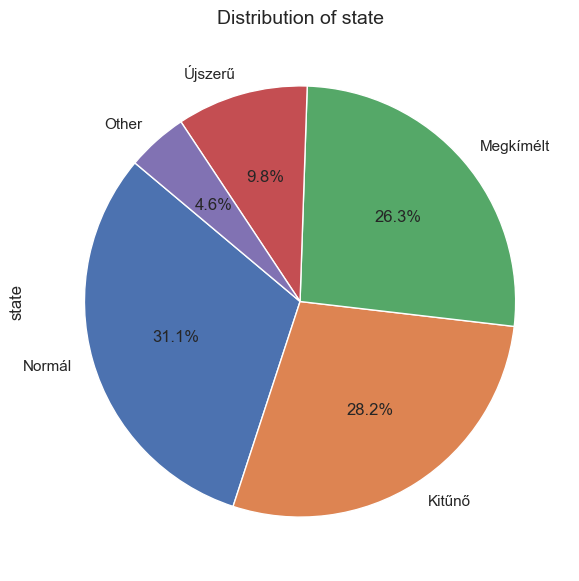

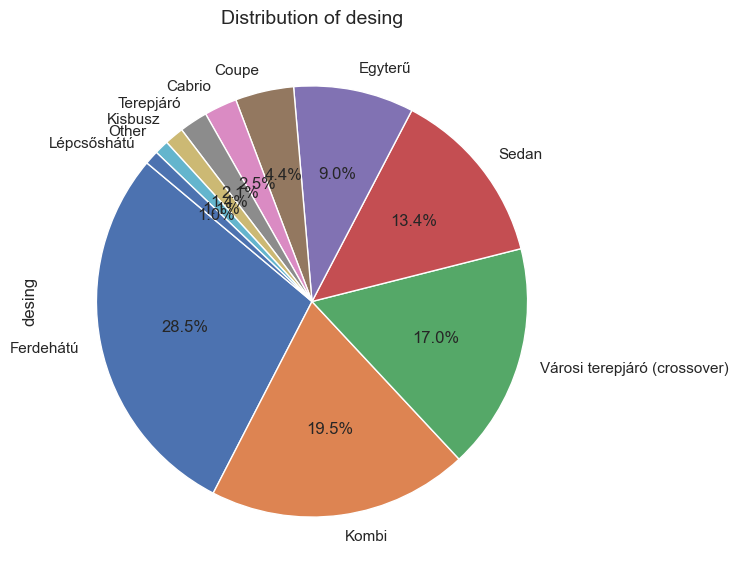

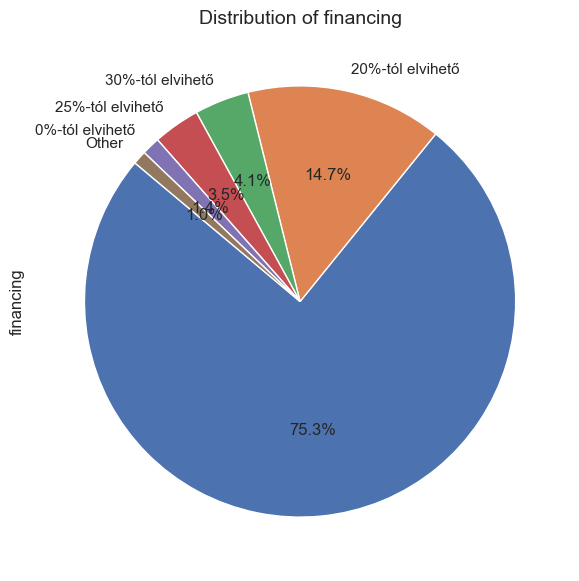

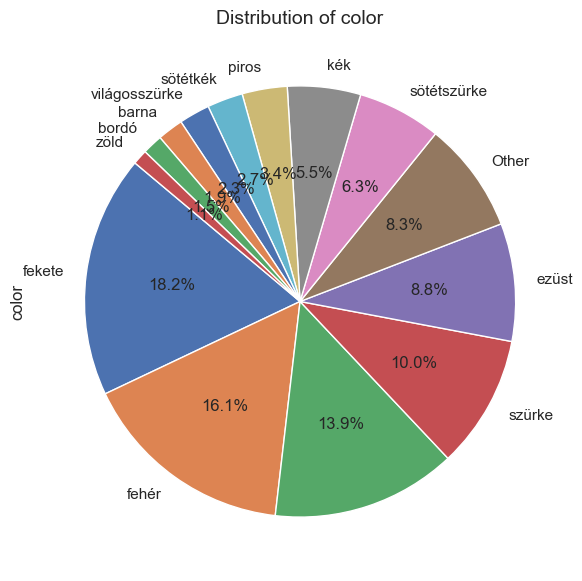

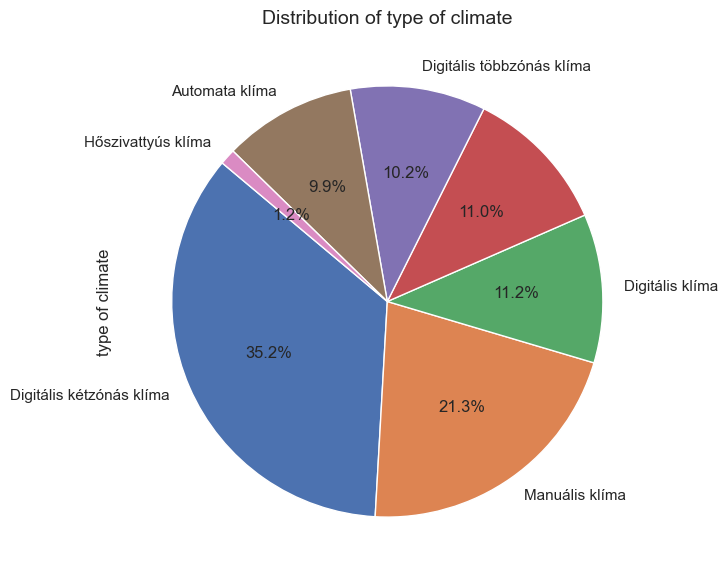

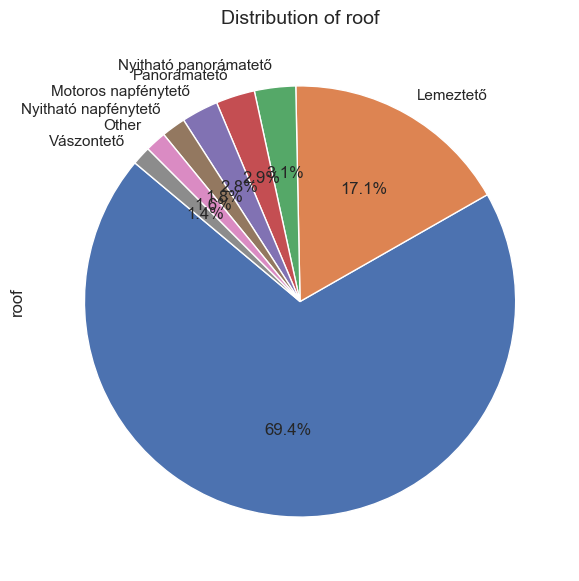

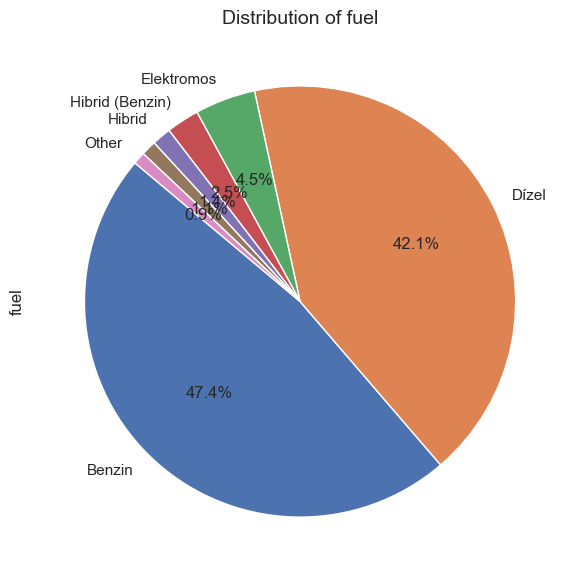

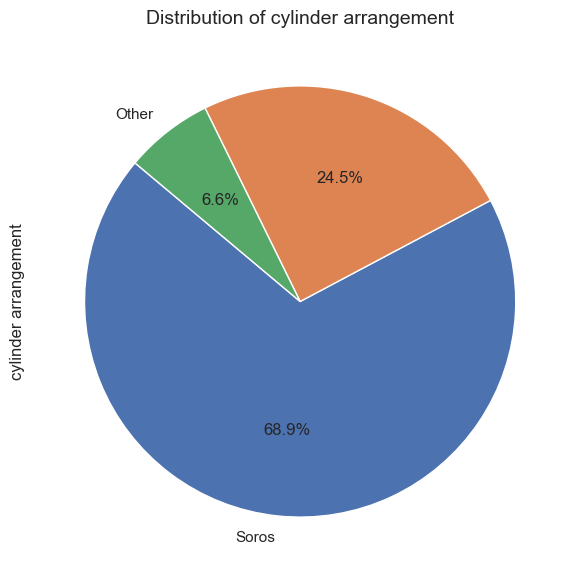

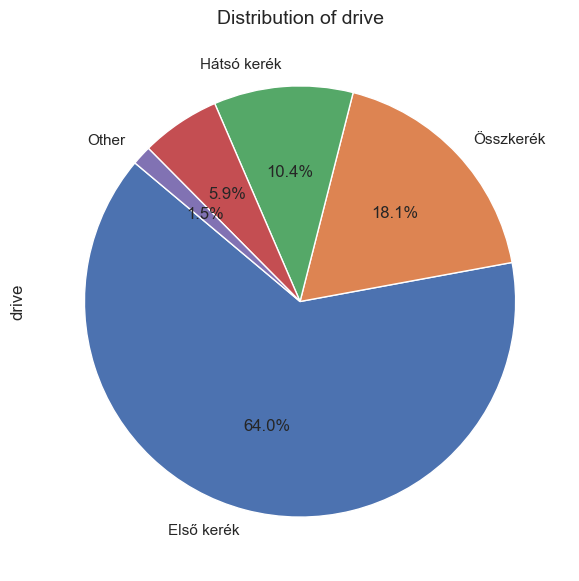

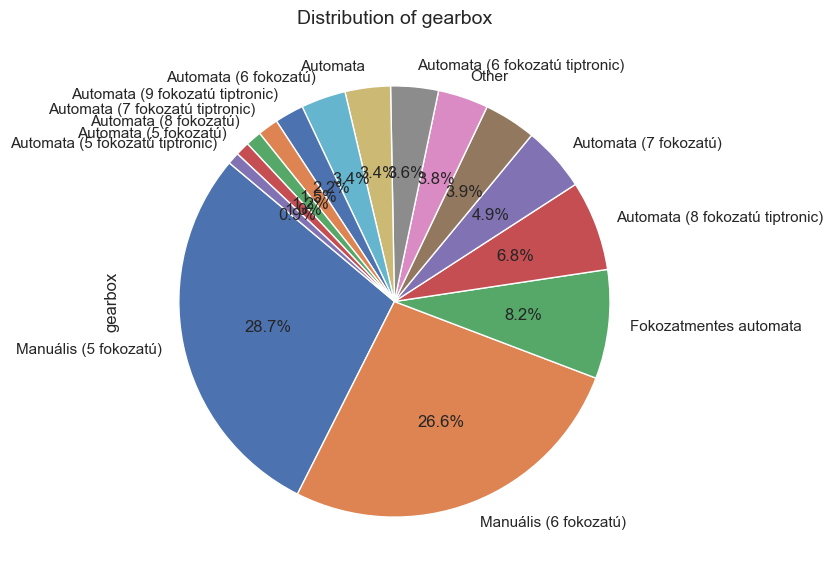

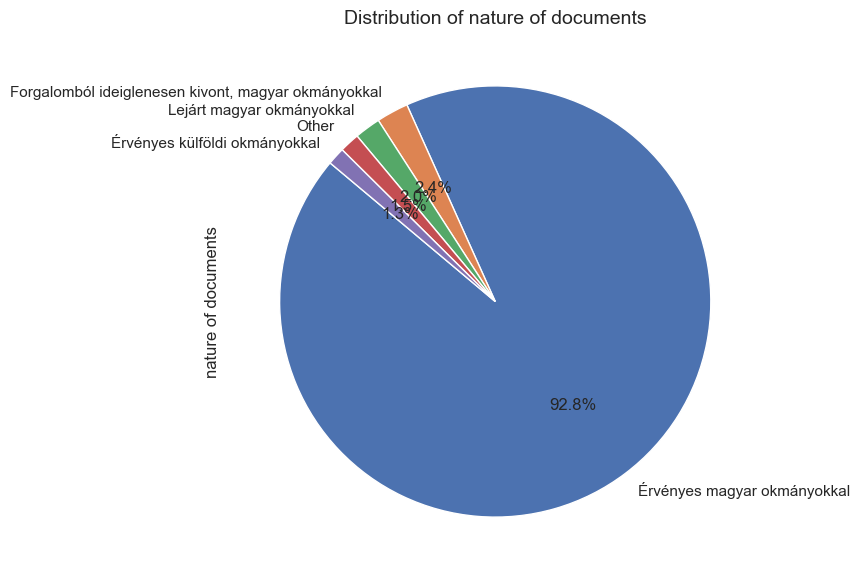

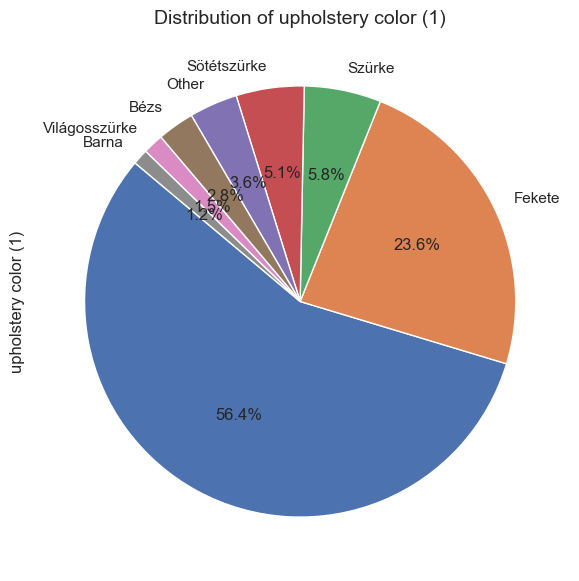

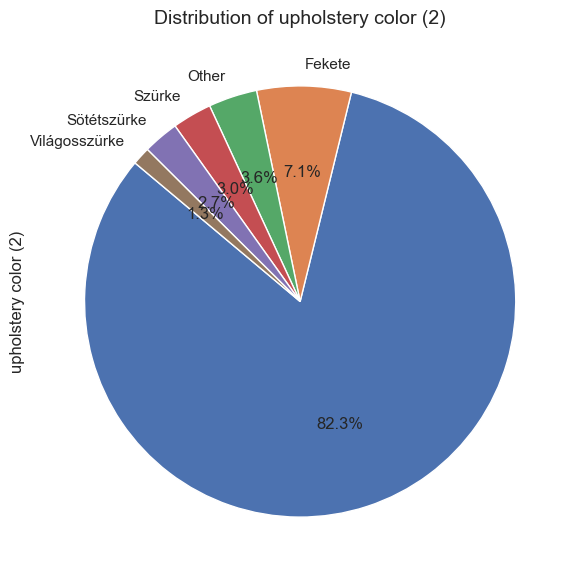

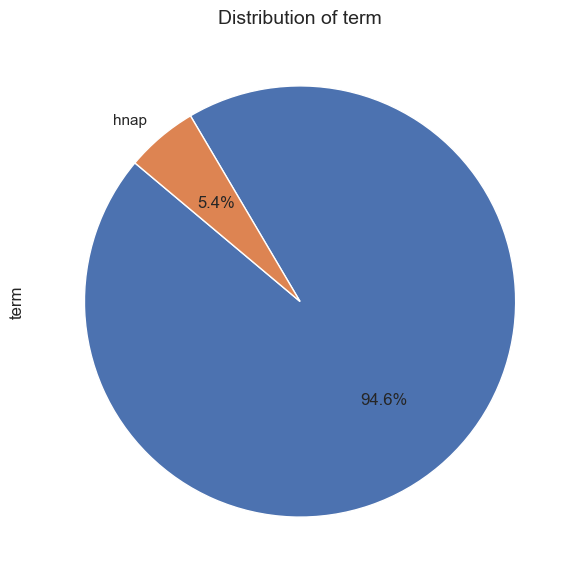

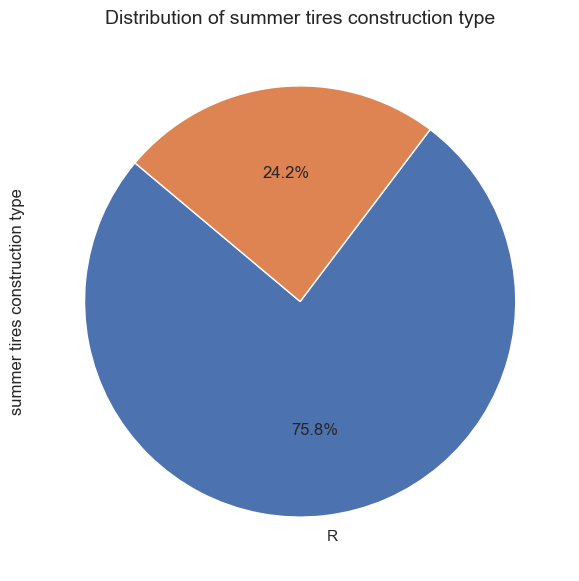

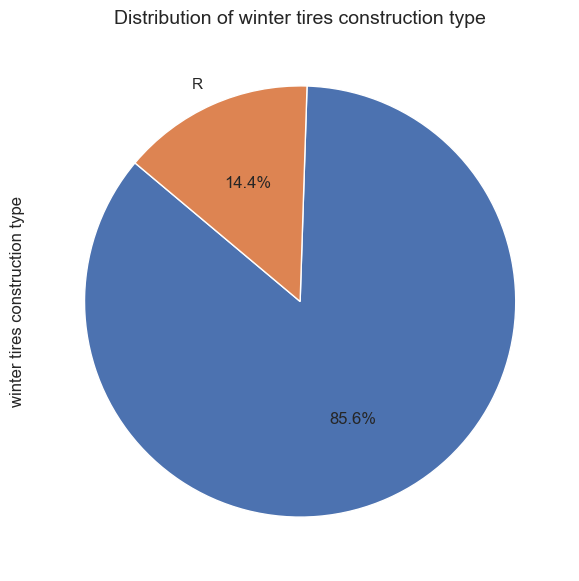

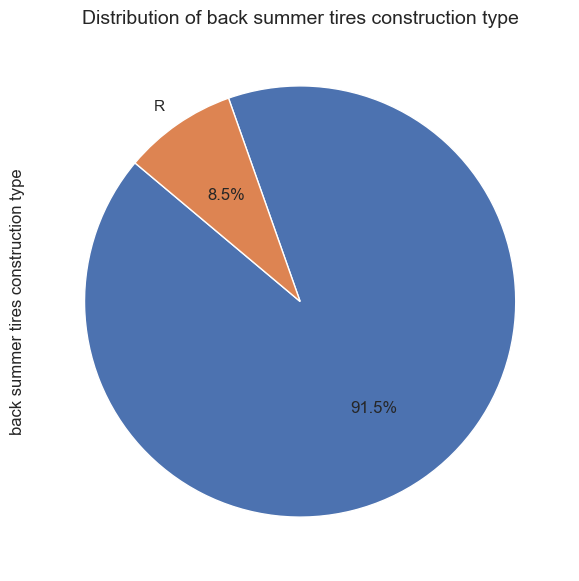

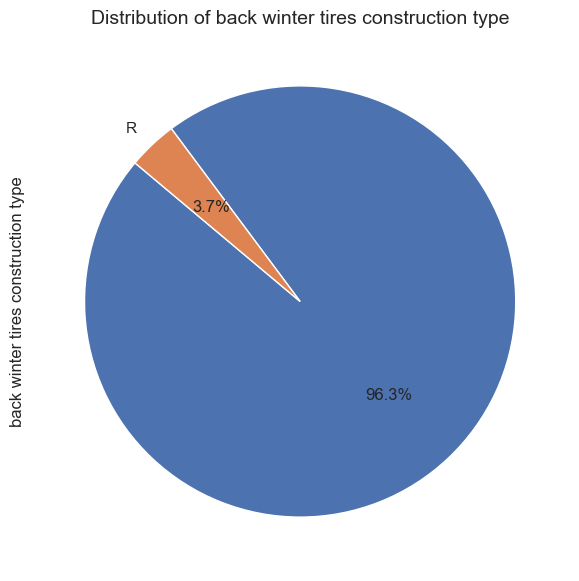

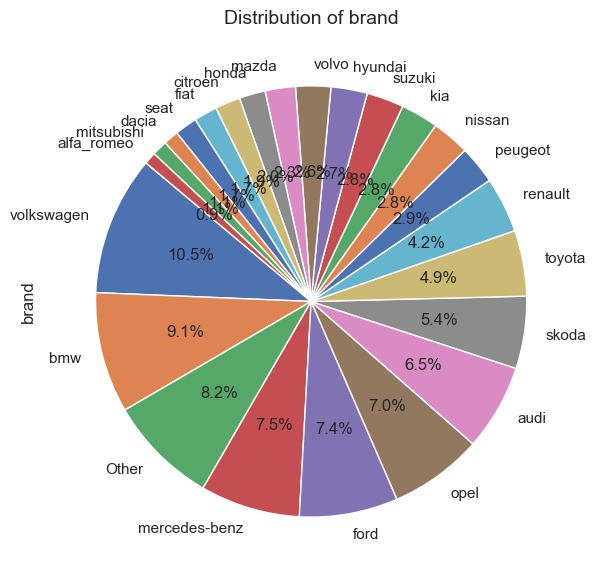

In [17]:
new_categorical_features = df2.select_dtypes(include=['object']).columns
for col in new_categorical_features:
    create_pie_chart(df2, col)

In [18]:
df2.to_parquet('used_cars_training_data.parquet')